Predict the price of the Uber ride from a given pickup point to the agreed drop-off 
location. Perform following tasks: 1. Pre-process the dataset.
2. Identify outliers. 3. Check the correlation. 4. Implement linear regression and 
ridge, Lasso regression models. 5. Evaluate the models and compare their respective 
scores like R2, RMSE, etc. Dataset link: 
https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("C:/Users/Ayaan/Downloads/uber.csv")  

data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [3]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

data['hour'] = data['pickup_datetime'].dt.hour
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek

data = data.drop(columns=['Unnamed: 0', 'key', 'pickup_datetime'])

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

X = data_imputed.drop(columns=['fare_amount'])
y = data_imputed['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,3


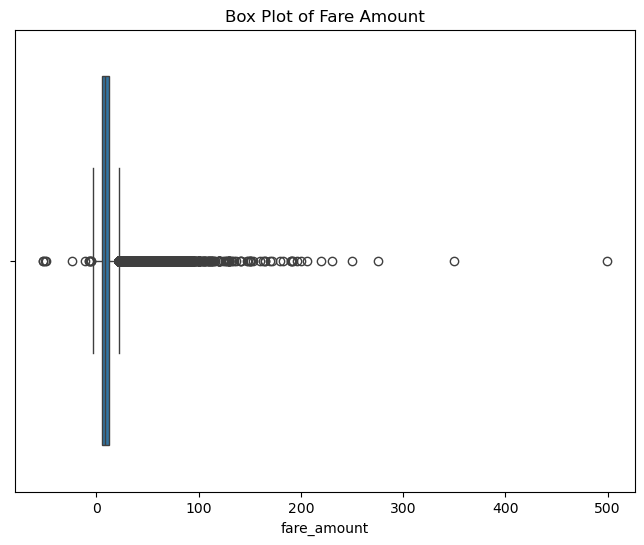

In [5]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='fare_amount')
plt.title('Box Plot of Fare Amount')
plt.show()

Shape after removing outliers: (182822, 8)
Minimum Fare: 0.01
Maximum Fare: 22.2


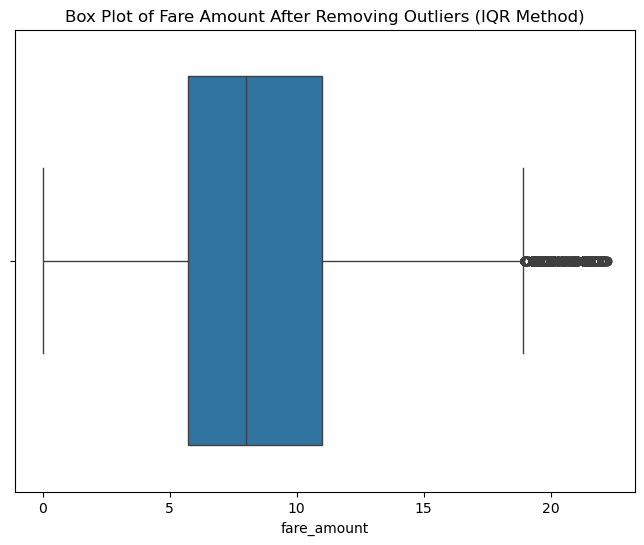

In [6]:
# Outlier removal using IQR method
Q1 = data['fare_amount'].quantile(0.25)   # 25th percentile
Q3 = data['fare_amount'].quantile(0.75)   # 75th percentile
IQR = Q3 - Q1                             # Interquartile Range

# Define lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Keep only data within the limits
data = data[(data['fare_amount'] > 0) & (data['fare_amount'] <= upper_limit)]

# Reset index
data = data.reset_index(drop=True)

print("Shape after removing outliers:", data.shape)
print("Minimum Fare:", data['fare_amount'].min())
print("Maximum Fare:", data['fare_amount'].max())

# Plot again to confirm
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='fare_amount')
plt.title('Box Plot of Fare Amount After Removing Outliers (IQR Method)')
plt.show()


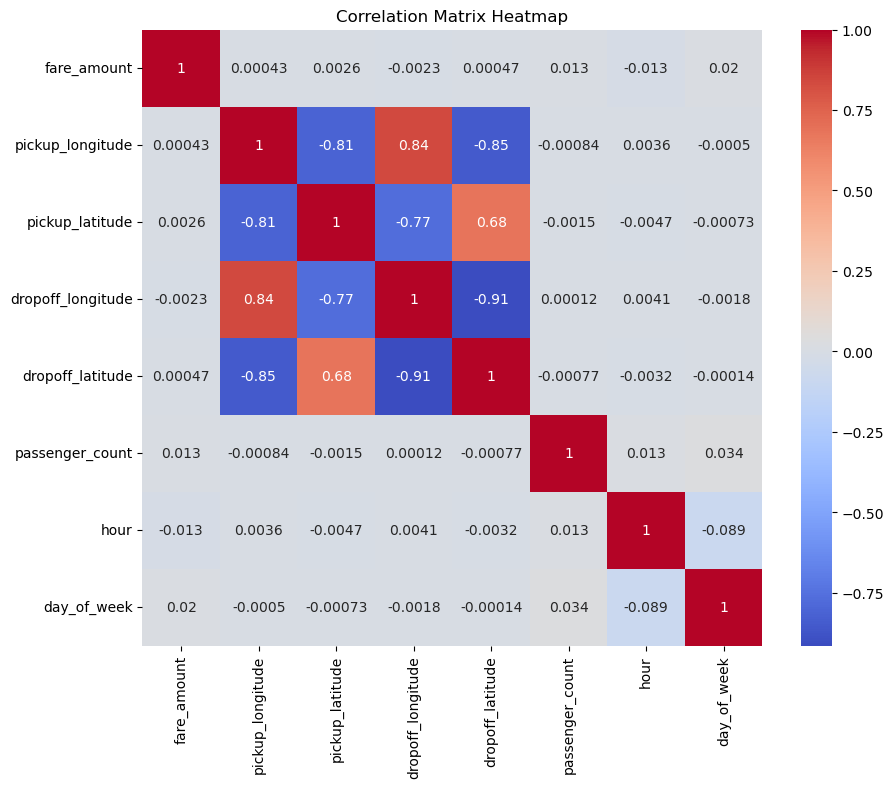

In [7]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [8]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Ridge Regression
ridge = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Lasso Regression
lasso = Lasso(alpha=1.0)  # You can adjust the alpha parameter
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Print results
print("Linear Regression - R2:", r2_lr, "RMSE:", rmse_lr)
print("Ridge Regression - R2:", r2_ridge, "RMSE:", rmse_ridge)
print("Lasso Regression - R2:", r2_lasso, "RMSE:", rmse_lasso)


Linear Regression - R2: 0.0007463283549304922 RMSE: 10.307359776695948
Ridge Regression - R2: 0.0007463398803480015 RMSE: 10.307359717253272
Lasso Regression - R2: -1.683808098018602e-05 RMSE: 10.311295078556256
